# CNN 심화

## [예제2] 3 Conv Flower-Photos Classification

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Import Keras Layers

In [2]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

>### Define Model

In [3]:
IMG_SIZE = 112

In [4]:
def create_model():
  model = tf.keras.models.Sequential()

  model.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=2, strides=2))

  model.add(Flatten())
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(5, activation='softmax'))

  return model

> ### Download Data

In [5]:
import pathlib
data_dir = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)
print (data_dir)

228818944/228813984 [==============================] - 2s 0us/step
/root/.keras/datasets/flower_photos


> ### Data의 파일 구조

In [6]:
import os
entrys = os.listdir(data_dir)
for entry in entrys:
  print(entry)

LICENSE.txt
roses
dandelion
daisy
tulips
sunflowers


> ### Check Data

In [7]:
def check_dir(d_path):
  img_count = len(list(d_path.glob('*/*.jpg')))
  c_name = np.array([item.name for item in d_path.glob('*') if item.name != "LICENSE.txt"])
  return img_count, c_name, len(c_name)

In [8]:
image_count, CLASS_NAMES, class_num = check_dir(data_dir)

print('image_count: {}\nCLASS_NAMES: {}\nclass num: {}'.format(image_count, CLASS_NAMES, class_num))

image_count: 3670
CLASS_NAMES: ['roses' 'dandelion' 'daisy' 'tulips' 'sunflowers']
class num: 5


> ### ImageDataGenerator

In [9]:
BATCH_N = 128

In [10]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        validation_split=0.2, # validation용으로 사용할 데이터의 비율
        rescale=1./255)       # 0 ~ 255 를 0 ~ 1 로 변경

train_data_gen = image_gen.flow_from_directory(
                      directory=str(data_dir),    # 디렉터리 지정
                      batch_size=BATCH_N,         # 한번에 생성할 데이터의 크기 설정
                      target_size=(IMG_SIZE, IMG_SIZE), # 변경될 이미지 데이터의 크기
                      classes = list(CLASS_NAMES),# 클래스 번호(0 ~ 4) 부어: 디렉터리 순
                      class_mode = 'sparse',      # Label을 0 ~ 4로 표기
                      subset='training'           # Training 용 데이터: 전체의 80%
                      )

test_data_gen = image_gen.flow_from_directory(
                      directory=str(data_dir),    # 디렉터리 지정
                      batch_size=BATCH_N,         # 한번에 생성할 데이터의 크기 설정
                      target_size=(IMG_SIZE, IMG_SIZE), # 변경될 이미지 데이터의 크기
                      classes = list(CLASS_NAMES),# 클래스 번호(0 ~ 4) 부어: 디렉터리 순
                      class_mode = 'sparse',      # Label을 0 ~ 4로 표기
                      subset='validation'         # Testing 용 데이터: 전체의 20%
                      )

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


> ### 이미지를 그리는 함수

In [11]:
def Plot_Images(suptitle, data, label):
    fig_result, ax_result = plt.subplots(2, 5, figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        ax_result[idx//5][idx%5].imshow(data[idx],cmap="binary")
        ax_result[idx//5][idx%5].set_title("test_data[{}] (label : {})".format(idx, label[idx]))

> ### 학습할 이미지 확인

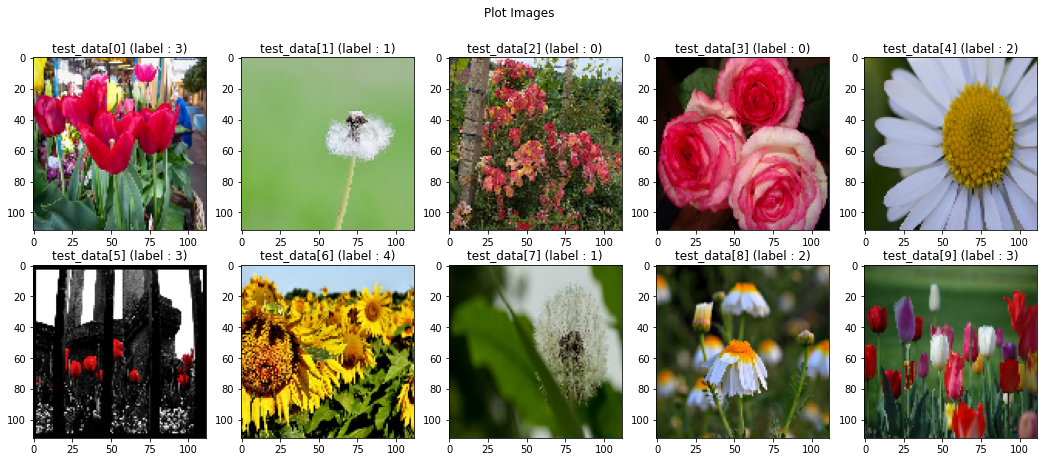

In [12]:
train_data, train_labels = next(train_data_gen)
train_labels = train_labels.astype(np.int8)
Plot_Images("Plot Images", train_data, train_labels)

> ### Create Model

In [13]:
model = create_model()
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff90fd54860>>

>### Compile Model

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

> ### Training

In [15]:
%%time
history = model.fit(
                        train_data_gen,     # Training 시 사용할 Generator
                        steps_per_epoch=22, # Epoch 당 22번 train_data_gen 돌림
                        epochs=50,
                        validation_data=test_data_gen,  # Testing 시 사용할 Generator
                        validation_steps=6  # Testing 시 6번 test_data_gen 돌림
                        )

Epoch 1/50
22/22 [==============================] - 11s 514ms/step - loss: 25.0051 - accuracy: 0.4191 - val_loss: 4.3480 - val_accuracy: 0.1956
Epoch 2/50
22/22 [==============================] - 10s 477ms/step - loss: 3.5341 - accuracy: 0.5375 - val_loss: 3.3800 - val_accuracy: 0.2353
Epoch 3/50
22/22 [==============================] - 10s 475ms/step - loss: 1.7398 - accuracy: 0.6268 - val_loss: 3.4813 - val_accuracy: 0.2353
Epoch 4/50
22/22 [==============================] - 11s 480ms/step - loss: 1.1041 - accuracy: 0.7019 - val_loss: 2.9670 - val_accuracy: 0.3256
Epoch 5/50
22/22 [==============================] - 11s 479ms/step - loss: 0.7903 - accuracy: 0.7545 - val_loss: 4.0972 - val_accuracy: 0.2503
Epoch 6/50
22/22 [==============================] - 11s 484ms/step - loss: 0.5935 - accuracy: 0.8161 - val_loss: 2.6883 - val_accuracy: 0.2558
Epoch 7/50
22/22 [==============================] - 11s 479ms/step - loss: 0.3937 - accuracy: 0.8634 - val_loss: 3.1767 - val_accuracy: 0.285

> ### Ploting

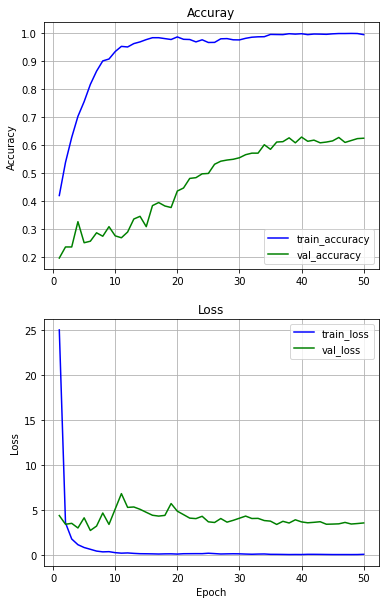

In [16]:
loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

> ### 결과 출력을 위한 함수

In [17]:
def Make_Result_Plot(suptitle, data, label, y_max):
    fig_result, ax_result = plt.subplots(2,5,figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        ax_result[idx//5][idx%5].imshow(data[idx],cmap="binary")
        ax_result[idx//5][idx%5].set_title("test_data[{}] (label : {} / y : {})".format(idx, label[idx], y_max[idx]))

> ### 학습 후 상황

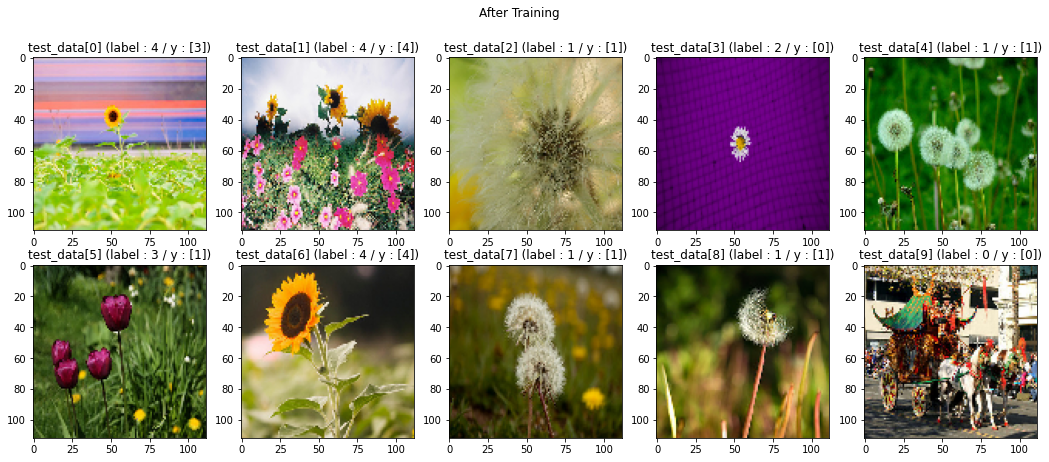

In [18]:
test_data, test_labels = next(test_data_gen)
test_labels = test_labels.astype(np.int8)
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)

> ### ImageDataGenerator (Data Augmentation)

In [19]:
image_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True, 
        vertical_flip=True,
        validation_split=0.2,
        rescale=1./255)

train_data_gen = image_gen.flow_from_directory(
                      directory=str(data_dir),
                      batch_size=BATCH_N,
                      target_size=(IMG_SIZE, IMG_SIZE),
                      classes = list(CLASS_NAMES),
                      class_mode = 'sparse',
                      subset='training'
                      )

test_data_gen = image_gen.flow_from_directory(
                      directory=str(data_dir),
                      batch_size=BATCH_N,
                      target_size=(IMG_SIZE, IMG_SIZE),
                      classes = list(CLASS_NAMES),
                      class_mode = 'sparse',
                      subset='validation'
                      )

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


> ### 학습할 이미지 확인 (Data Augmentation)

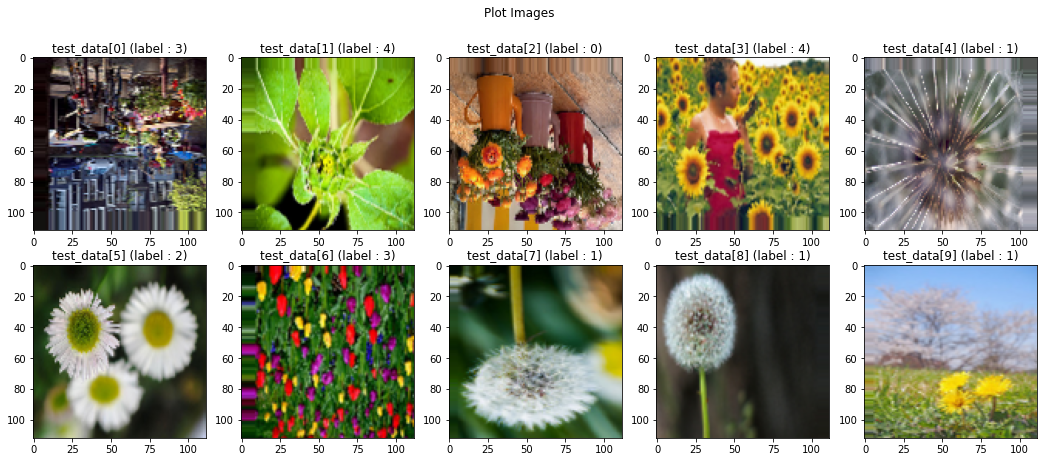

In [20]:
train_data, train_labels = next(train_data_gen)
train_labels = train_labels.astype(np.int8)
Plot_Images("Plot Images", train_data, train_labels)

> ### Create Model (Data Augmentation)

In [21]:
model = create_model()

> ### Compile Model (Data Augmentation)

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

> ### Training (Data Augmentation)

In [23]:
%%time
history = model.fit(train_data_gen, 
                        steps_per_epoch=22,
                        epochs=50,
                        validation_data=test_data_gen,
                        validation_steps=6
                        )

Epoch 1/50
22/22 [==============================] - 19s 885ms/step - loss: 14.7012 - accuracy: 0.4251 - val_loss: 12.3188 - val_accuracy: 0.2148
Epoch 2/50
22/22 [==============================] - 19s 851ms/step - loss: 2.2781 - accuracy: 0.4963 - val_loss: 11.9802 - val_accuracy: 0.2599
Epoch 3/50
22/22 [==============================] - 19s 850ms/step - loss: 1.2019 - accuracy: 0.5706 - val_loss: 20.9956 - val_accuracy: 0.2627
Epoch 4/50
22/22 [==============================] - 19s 846ms/step - loss: 1.0206 - accuracy: 0.6119 - val_loss: 21.7671 - val_accuracy: 0.2449
Epoch 5/50
22/22 [==============================] - 19s 847ms/step - loss: 0.9444 - accuracy: 0.6411 - val_loss: 16.4043 - val_accuracy: 0.2503
Epoch 6/50
22/22 [==============================] - 19s 851ms/step - loss: 0.8602 - accuracy: 0.6699 - val_loss: 11.2622 - val_accuracy: 0.2572
Epoch 7/50
22/22 [==============================] - 19s 850ms/step - loss: 0.8479 - accuracy: 0.6770 - val_loss: 9.0515 - val_accuracy:

> ### Ploting (Data Augmentation)

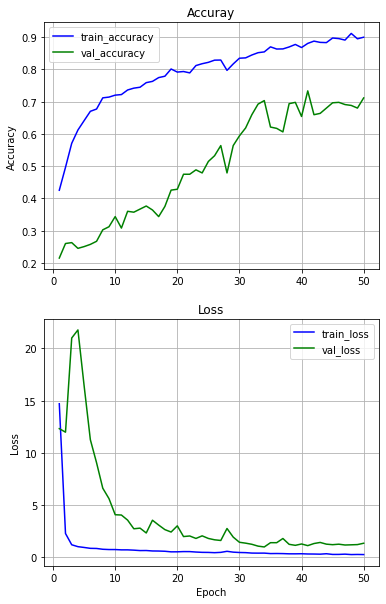

In [24]:
loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

> ### 학습 후 상황 (Data Augmentation)

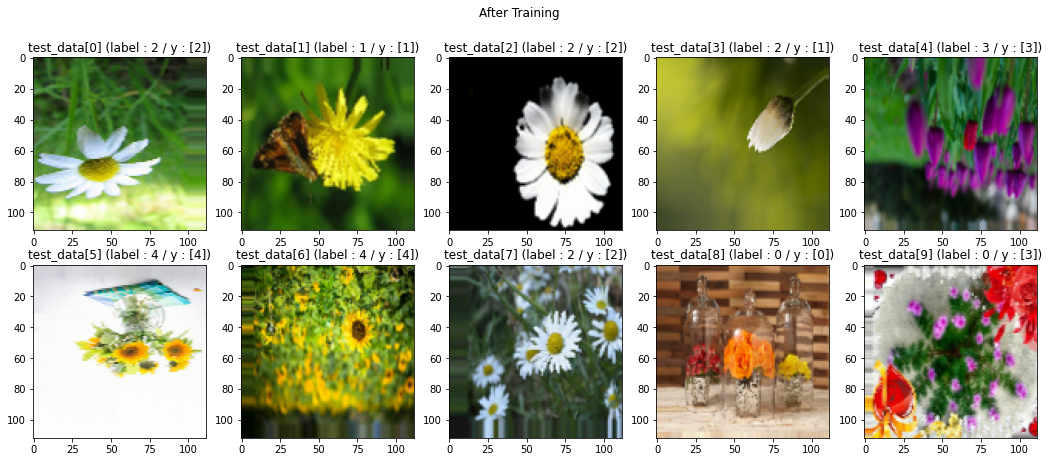

In [25]:
test_data, test_labels = next(test_data_gen)
test_labels = test_labels.astype(np.int8)
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)